In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
np.random.seed(42)

In [6]:
employee_ids = [f"EMP{str(i).zfill(3)}" for i in range(1, 31)]

In [7]:
dates = pd.date_range(start="2025-07-07", periods=7)

In [8]:
data = []
for emp in employee_ids:
    for date in dates:
        hours = np.round(np.random.uniform(4, 10), 2)
        data.append({"EmployeeID": emp, "Date": date, "WorkingHours": hours})

In [9]:
df = pd.DataFrame(data)

In [10]:
df.head()

,EmployeeID,Date,WorkingHours
0,EMP001,2025-07-07,6.25
1,EMP001,2025-07-08,9.70
2,EMP001,2025-07-09,8.39
3,EMP001,2025-07-10,7.59
4,EMP001,2025-07-11,4.94


In [11]:
print(df.describe())
print(df.isnull().sum())

                      Date  WorkingHours
count                  210    210.000000
mean   2025-07-10 00:00:00      6.861190
min    2025-07-07 00:00:00      4.030000
25%    2025-07-08 00:00:00      5.285000
50%    2025-07-10 00:00:00      6.950000
75%    2025-07-12 00:00:00      8.387500
max    2025-07-13 00:00:00      9.920000
std                    NaN      1.785159
EmployeeID      0
Date            0
WorkingHours    0
dtype: int64


<Axes: title={'center': 'Distribution of Working Hours'}, ylabel='Frequency'>

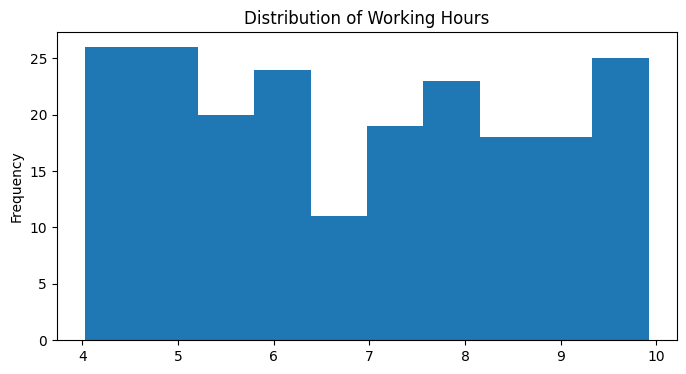

In [12]:
df['WorkingHours'].plot(kind='hist', bins=10, title='Distribution of Working Hours', figsize=(8, 4))

In [13]:
weekly_hours = df.groupby("EmployeeID")["WorkingHours"].sum().reset_index()
weekly_hours.columns = ["EmployeeID", "TotalHours"]

In [14]:
avg_hours = df.groupby("EmployeeID")["WorkingHours"].mean().reset_index()
avg_hours.columns = ["EmployeeID", "AvgDailyHours"]

In [15]:
summary = pd.merge(weekly_hours, avg_hours, on="EmployeeID")

In [16]:
summary["Anomaly"] = summary["TotalHours"].apply(lambda x: "Low" if x < 35 else ("High" if x > 65 else "Normal"))

In [17]:
summary.head()

,EmployeeID,TotalHours,AvgDailyHours,Anomaly
0,EMP001,46.16,6.594286,Normal
1,EMP002,53.26,7.608571,Normal
2,EMP003,43.18,6.168571,Normal
3,EMP004,44.53,6.361429,Normal
4,EMP005,48.37,6.910000,Normal


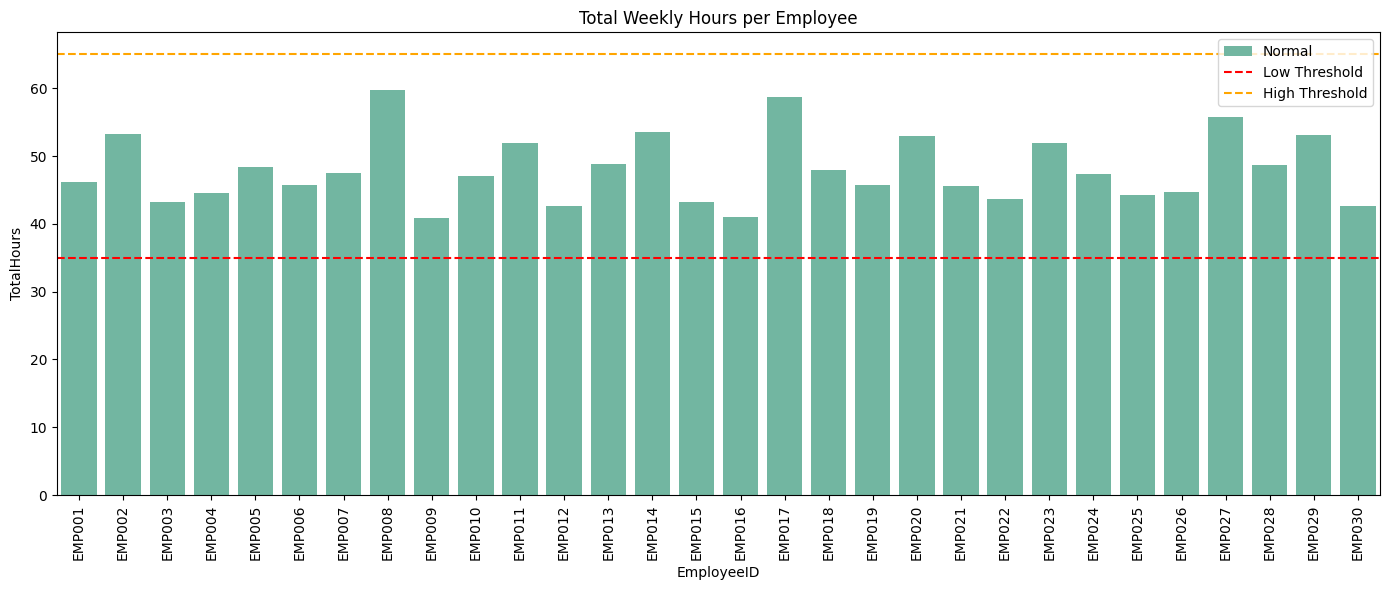

In [18]:
plt.figure(figsize=(14, 6))
sns.barplot(data=summary, x="EmployeeID", y="TotalHours", hue="Anomaly", palette="Set2")
plt.axhline(35, color="red", linestyle="--", label="Low Threshold")
plt.axhline(65, color="orange", linestyle="--", label="High Threshold")
plt.title("Total Weekly Hours per Employee")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

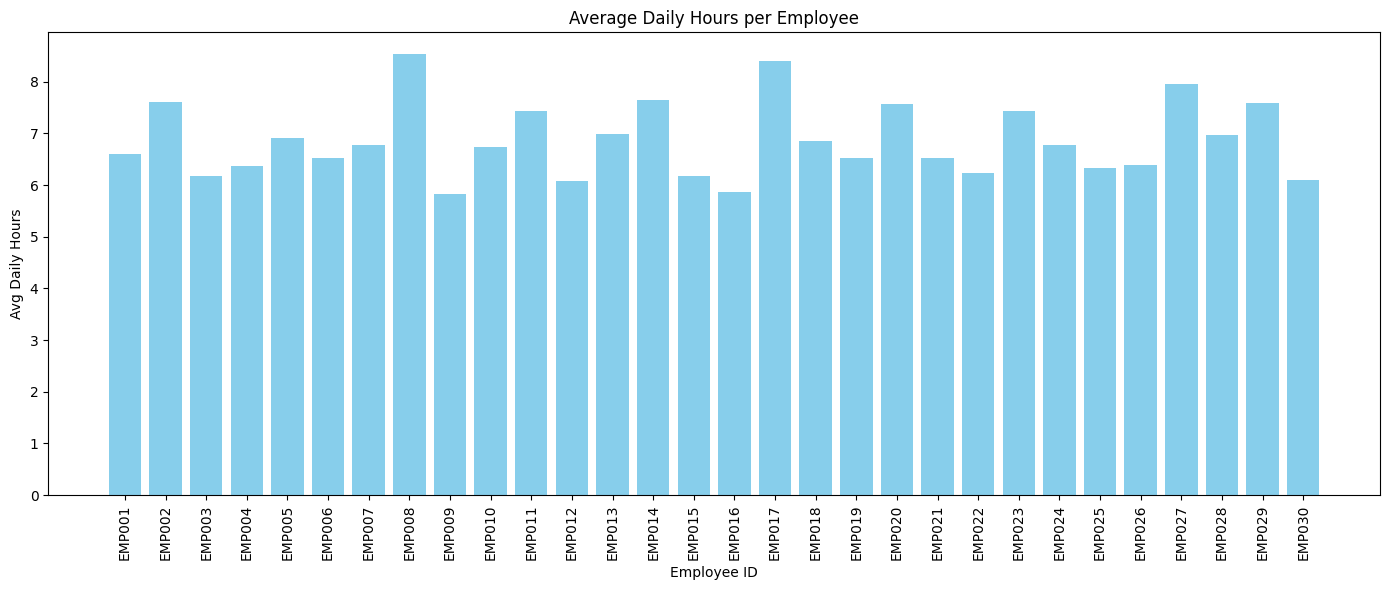

In [24]:
plt.figure(figsize=(14, 6))
plt.bar(summary["EmployeeID"], summary["AvgDailyHours"], color='skyblue')
plt.title("Average Daily Hours per Employee")
plt.xlabel("Employee ID")
plt.ylabel("Avg Daily Hours")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
